In [1]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9681 sha256=b62dbda3157b23588467f7db892540d1642c412930d87a912b81ef1ad95b136c
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
Successfully built gdown


In [2]:
import pandas as pd
import os

In [3]:
base_dir = "../input/vinbigdata-chest-xray-abnormalities-detection"

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [4]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [5]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2588, done.
remote: Counting objects: 100% (2588/2588), done.
remote: Compressing objects: 100% (2165/2165), done.
remote: Total 2588 (delta 640), reused 1288 (delta 391), pack-reused 0
Receiving objects: 100% (2588/2588), 32.52 MiB | 16.18 MiB/s, done.
Resolving deltas: 100% (640/640), done.


In [6]:
# Install the Object Detection API
os.chdir("models/research/")
!pwd

/kaggle/working/models/research


In [7]:
!protoc object_detection/protos/*.proto --python_out=.

In [8]:
!cp "object_detection/packages/tf2/setup.py" .
!python -m pip install .

Processing /kaggle/working/models/research
     |████████████████████████████████| 9.0 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 352 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 151 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 2.8 MB/s  eta 0:00:01
     |████████████████████████████████| 95 kB 2.2 MB/s  eta 0:00:01     |███████████████████████████████ | 92 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 2.7 MB/s  eta 0:00:01
     |████████████████████████████████| 46 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 172 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 43 kB 1.4 MB/s  eta 0:00:01
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1644003 sha256=2ea910ddc73bc74e3ef5f55a8d8f26970

In [9]:
#run model builder test
!python object_detection/builders/model_builder_tf2_test.py

2021-04-12 08:13:56.805049: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2
2021-04-12 08:13:56.807820: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2
Running tests under Python 3.7.9: /opt/conda/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-04-12 08:14:01.283259: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-12 08:14:01.287105: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-12 08:14:01.655116: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-12 08:14:01.656314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found de

In [10]:
import gdown

url = 'https://drive.google.com/uc?id=1101M9BgzjbBebHXh4GlwY1ZJV84yJ9WK'
output = 'generate_tfrecord.py'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1101M9BgzjbBebHXh4GlwY1ZJV84yJ9WK
To: /kaggle/working/models/research/generate_tfrecord.py
100%|██████████| 3.98k/3.98k [00:00<00:00, 5.98MB/s]


'generate_tfrecord.py'

In [11]:
content = '''item {
    id: 1
    name: 'Aortic enlargement'
}
item {
    id: 2
    name: 'Atelectasis'
}
item {
    id: 3
    name: 'Calcification'
}
item {
    id: 4
    name: 'Cardiomegaly'
}
item {
    id: 5
    name: 'Consolidation'
}
item {
    id: 6
    name: 'ILD'
}
item {
    id: 7
    name: 'Infiltration'
}
item {
    id: 8
    name: 'Lung Opacity'
}
item {
    id: 9
    name: 'Nodule/Mass'
}
item {
    id: 10
    name: 'Pleural effusion'
}
item {
    id: 11
    name: 'Pleural thickening'
}
item {
    id: 12
    name: 'Pneumothorax'
}
item {
    id: 13
    name: 'Pulmonary fibrosis'
}
'''

In [12]:
os.chdir("/kaggle/working")

In [13]:
!pwd

/kaggle/working


In [40]:
!python models/research/object_detection/dataset_tools/create_coco_tf_record.py --logtostderr \
--train_image_dir="../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled" \
--test_image_dir="../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled" \
--val_image_dir="../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled" \
--train_annotations_file="../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled/train_annotations.json" \
--val_annotations_file="../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled/val_annotations.json" \
--testdev_annotations_file="../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled/val_annotations.json" \
--output_dir="/kaggle/working/training_job/tfrecords/"

2021-04-12 08:17:21.742198: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2
2021-04-12 08:17:21.744950: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2
I0412 08:17:24.780772 140028463454016 create_coco_tf_record.py:399] Found groundtruth annotations. Building annotations index.
I0412 08:17:24.788562 140028463454016 create_coco_tf_record.py:412] 0 images are missing annotations.
I0412 08:17:24.788910 140028463454016 create_coco_tf_record.py:441] On image 0 of 3296
I0412 08:17:26.873895 140028463454016 create_coco_tf_record.py:441] On image 100 of 3296
I0412 08:17:28.357344 140028463454016 create_coco_tf_record.py:441] On image 200 of 3296
I0412 08:17:29.602925 140028463454016 create_coco_tf_record.py:441] On image 300 of 3296
I0412 08:17:30.892135 140028463454016 create_coco_tf_record.py:441] On image 400 of 3296
I0412 08:17:32.090584 14002846345401

In [41]:
model_files_dir = "/kaggle/working/training_job/model_files/"

if not os.path.exists(model_files_dir):
    os.makedirs(model_files_dir)
    print('Model Files Directory:', model_files_dir)

In [42]:
with open('./training_job/labelmap.pbtxt', 'w') as f:
    f.write(content)

In [43]:
import tarfile 

pretrained_checkpoint = "efficientdet_d0_coco17_tpu-32.tar.gz"
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint
!wget {download_tar} -P {model_files_dir}

--2021-04-12 08:19:10--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.188.240, 2607:f8b0:4007:80a::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.188.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘/kaggle/working/training_job/model_files/efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  69.9MB/s    in 0.4s    

2021-04-12 08:19:11 (69.9 MB/s) - ‘/kaggle/working/training_job/model_files/efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [44]:
!tar -xf "./training_job/model_files/efficientdet_d0_coco17_tpu-32.tar.gz" --directory="./training_job/model_files"

In [45]:
!rm "./training_job/model_files/efficientdet_d0_coco17_tpu-32.tar.gz"

In [46]:
os.listdir("./training_job/model_files/efficientdet_d0_coco17_tpu-32")

['pipeline.config', 'saved_model', 'checkpoint']

In [47]:
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config'
!wget {download_config} -P {model_files_dir}

--2021-04-12 08:19:15--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: ‘/kaggle/working/training_job/model_files/ssd_efficientdet_d0_512x512_coco17_tpu-8.config.1’

ssd_efficientdet_d0 100%[===================>]   4.52K  --.-KB/s    in 0s      

2021-04-12 08:19:15 (30.9 MB/s) - ‘/kaggle/working/training_job/model_files/ssd_efficientdet_d0_512x512_coco17_tpu-8.config.1’ saved [4630/4630]



In [48]:
os.listdir('./training_job/model_files')

['ssd_efficientdet_d0_512x512_coco17_tpu-8.config.1',
 'efficientdet_d0_coco17_tpu-32',
 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
 'training']

In [49]:
# !rm "./training_job/model_files/ssd_efficientdet_d0_512x512_coco17_tpu-8.config"

In [50]:
with open("./training_job/model_files/ssd_efficientdet_d0_512x512_coco17_tpu-8.config") as f:
    x = f.read()
x

' # SSD with EfficientNet-b0 + BiFPN feature extractor,\n# shared box predictor and focal loss (a.k.a EfficientDet-d0).\n# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070\n# See Lin et al, https://arxiv.org/abs/1708.02002\n# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.\n#\n# Train on TPU-8\n\nmodel {\n  ssd {\n    inplace_batchnorm_update: true\n    freeze_batchnorm: false\n    num_classes: 13\n    add_background_class: false\n    box_coder {\n      faster_rcnn_box_coder {\n        y_scale: 10.0\n        x_scale: 10.0\n        height_scale: 5.0\n        width_scale: 5.0\n      }\n    }\n    matcher {\n      argmax_matcher {\n        matched_threshold: 0.5\n        unmatched_threshold: 0.5\n        ignore_thresholds: false\n        negatives_lower_than_unmatched: true\n        force_match_for_each_row: true\n        use_matmul_gather: true\n      }\n    }\n    similarity_calculator {\n      iou_similarity {\n      }\n    }\n    encode_background_as_zero

In [51]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())


val_record_fname = './training_job/tfrecords/coco_val.record*'
train_record_fname = './training_job/tfrecords/coco_train.record*'
label_map_pbtxt_fname = './training_job/labelmap.pbtxt'

base_config_path = './training_job/model_files/ssd_efficientdet_d0_512x512_coco17_tpu-8.config'
fine_tune_checkpoint = "./training_job/model_files/efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0"
num_classes = get_num_classes(label_map_pbtxt_fname)
print("No. of Classes", num_classes)
print("Checkpoint File Path", fine_tune_checkpoint)


No. of Classes 13
Checkpoint File Path ./training_job/model_files/efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0


In [52]:
batch_size = 16
num_steps = 8000
num_eval_steps = 1000

In [53]:
import re
print('Updading the Training Configuration file')
with open(base_config_path) as f:
    s = f.read()
    
with open(base_config_path, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")',
               'input_path: "{}"'.format(train_record_fname), s)
    
    s = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")',
               'input_path: "{}"'.format(val_record_fname), s)

    # label_map_path
    s = re.sub('label_map_path: ".*?"',
               'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    
    #fine-tune checkpoint type
    s = re.sub('fine_tune_checkpoint_type: "classification"',
               'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
        
    f.write(s)

Updading the Training Configuration file


In [54]:
with open("./training_job/model_files/ssd_efficientdet_d0_512x512_coco17_tpu-8.config") as f:
    x = f.read()
x

' # SSD with EfficientNet-b0 + BiFPN feature extractor,\n# shared box predictor and focal loss (a.k.a EfficientDet-d0).\n# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070\n# See Lin et al, https://arxiv.org/abs/1708.02002\n# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.\n#\n# Train on TPU-8\n\nmodel {\n  ssd {\n    inplace_batchnorm_update: true\n    freeze_batchnorm: false\n    num_classes: 13\n    add_background_class: false\n    box_coder {\n      faster_rcnn_box_coder {\n        y_scale: 10.0\n        x_scale: 10.0\n        height_scale: 5.0\n        width_scale: 5.0\n      }\n    }\n    matcher {\n      argmax_matcher {\n        matched_threshold: 0.5\n        unmatched_threshold: 0.5\n        ignore_thresholds: false\n        negatives_lower_than_unmatched: true\n        force_match_for_each_row: true\n        use_matmul_gather: true\n      }\n    }\n    similarity_calculator {\n      iou_similarity {\n      }\n    }\n    encode_background_as_zero

In [55]:
model_dir = "./training_job/model_files/training/"

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print('Training Files:', model_dir)

In [56]:
!nvidia-smi

Mon Apr 12 08:19:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [58]:
!rm -rf ./logs/ 
!mkdir ./logs/

In [59]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [60]:
!python "./models/research/object_detection/model_main_tf2.py" \
    --pipeline_config_path={base_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps=8000 \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps=1000

2021-04-12 08:19:19.893046: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2
2021-04-12 08:19:19.895886: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2
2021-04-12 08:19:23.477561: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-12 08:19:23.478781: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-12 08:19:23.812908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-12 08:19:23.814008: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz

In [61]:
os.listdir('./training_job/model_files')

['ssd_efficientdet_d0_512x512_coco17_tpu-8.config.1',
 'efficientdet_d0_coco17_tpu-32',
 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
 'training']

In [62]:
%reload_ext tensorboard
%tensorboard --logdir './logs'

Reusing TensorBoard on port 6006 (pid 342), started 2:50:18 ago. (Use '!kill 342' to kill it.)

In [63]:
import numpy as np

import sys
import cv2
import glob
import os.path as osp
import os
from path import Path
import random
import io
import scipy.misc
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [64]:
last_ckpt = Path(sorted(glob.glob(os.path.join(model_dir,'ckpt-*')))[-1]).stem
last_ckpt

'ckpt-9'

In [65]:
configs = config_util.get_configs_from_pipeline_file(base_config_path)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

## Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(model_dir, last_ckpt))

def get_model_detection_function(model):
    """Get a tf.function for detection."""
    @tf.function
    def detect_fn(image):
        """Detect objects in image."""
        image, shapes = model.preprocess(image)
        prediction_dict = model.predict(image, shapes)
        detections = model.postprocess(prediction_dict, shapes)
        return detections, prediction_dict, tf.reshape(shapes, [-1])
    return detect_fn

detect_fn = get_model_detection_function(detection_model)

In [66]:
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
                label_map,
                max_num_classes=label_map_util.get_max_label_map_index(label_map),
                use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [67]:
def plot_imgs(imgs, cols=2, size=10, is_rgb=True, title="", cmap='gray', img_size=None):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(round(cols*size), rows*size))
    plt.suptitle(title)
    for i, img in enumerate(imgs):
        if img_size is not None:
            img = cv2.resize(img, img_size)
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)   
    
def draw_bbox(image, box, label, color):   
    alpha = 0.1
    alpha_box = 0.4
    overlay_bbox = image.copy()
    overlay_text = image.copy()
    output = image.copy()
    output = cv2.rectangle(output, (box[0], box[1]), (box[2], box[3]),
                           color, 2)

    text_width, text_height = cv2.getTextSize(label.upper(), cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)[0]
    cv2.rectangle(overlay_bbox, (box[0], box[1]), (box[2], box[3]),
                  color, -1)
    cv2.addWeighted(overlay_bbox, alpha, output, 1 - alpha, 0, output)
    
    cv2.rectangle(overlay_text, (box[0], box[1]-7-text_height),
                  (box[0]+text_width+2, box[1]), (0, 0, 0), -1)
    
    cv2.addWeighted(overlay_text, alpha_box, output, 1 - alpha_box, 0, output)
    cv2.putText(output, label.upper(), (box[0], box[1]-5),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2, cv2.LINE_AA)
    return output

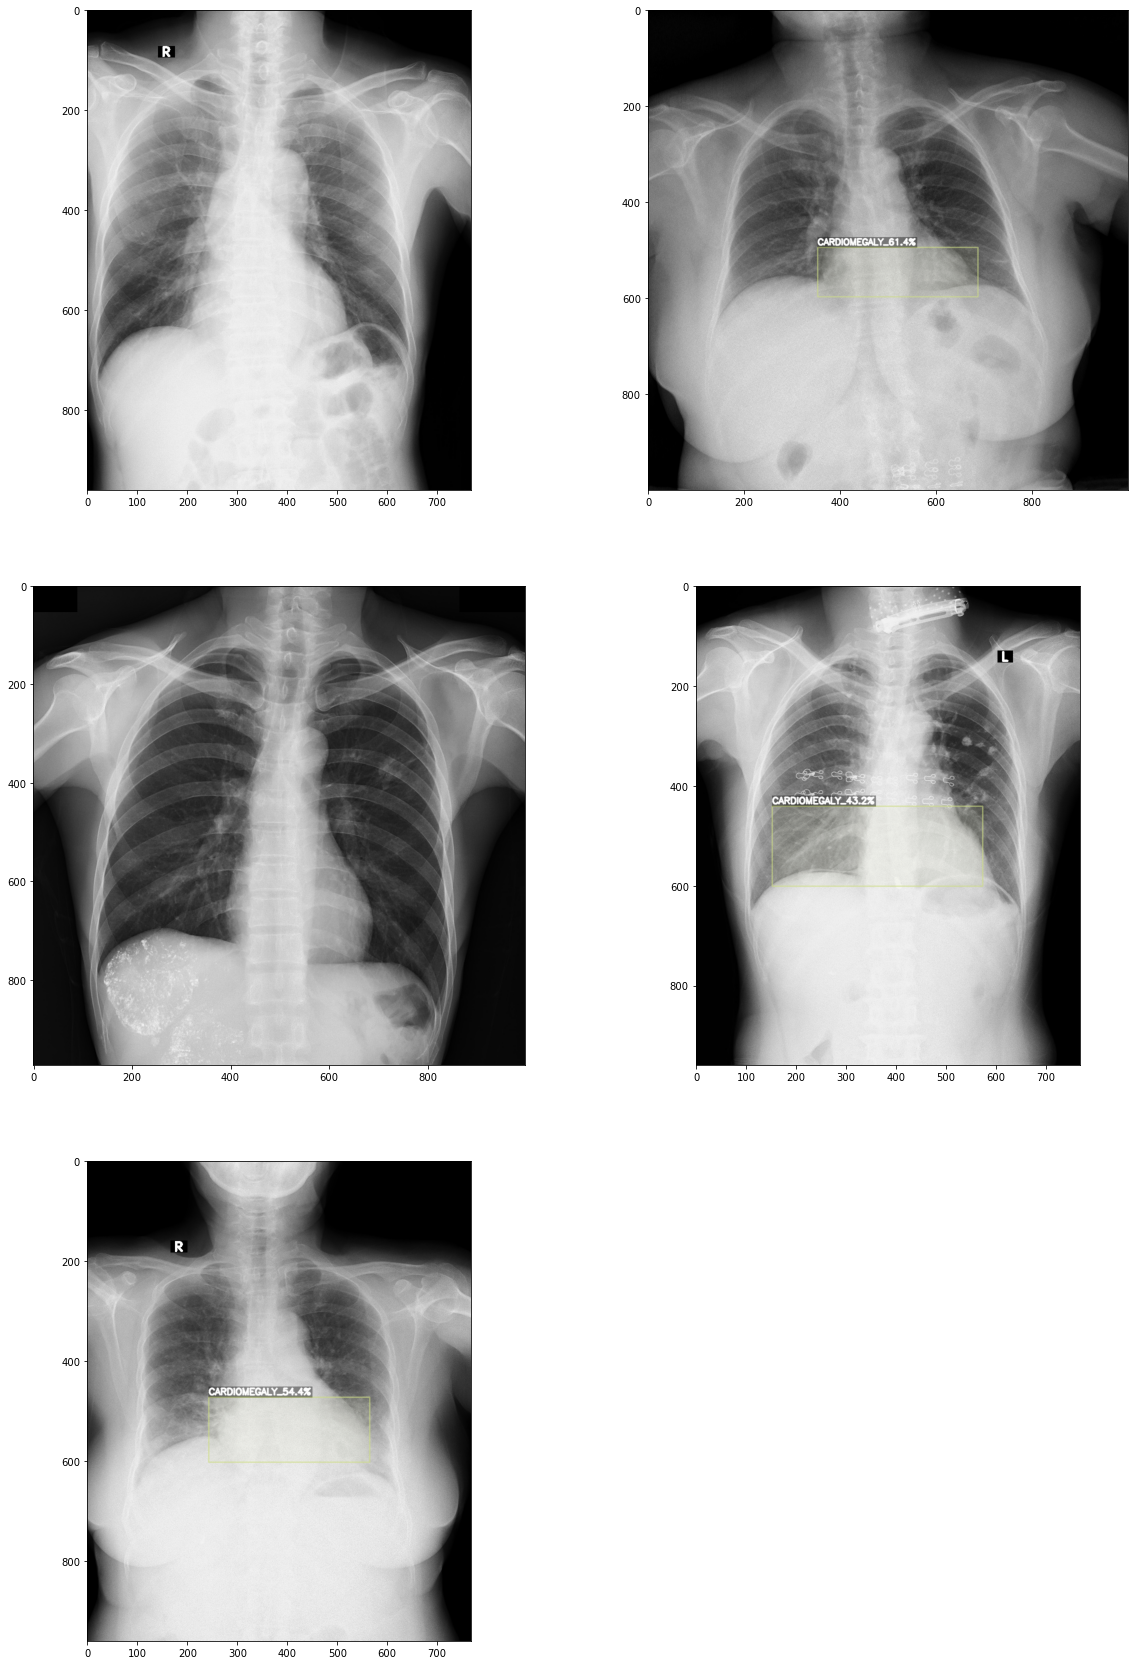

In [68]:
val_images = glob.glob('../input/vinbigdata-coco-dataset-with-wbf-3x-downscaled/vinbigdata-coco-dataset-with-wbf-3x-downscaled/val_images/*.jpg')

viz_images = []
for img_path in val_images[20:25]:
    image_np = cv2.imread(img_path)
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0),
                                        dtype=tf.float32)
    detections, predictions_dict, shapes = detect_fn(input_tensor)
    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    label2color = [[59, 238, 119], [222, 21, 229], [94, 49, 164], [206, 221, 133], [117, 75, 3],
                 [210, 224, 119], [211, 176, 166], [63, 7, 197], [102, 65, 77], [194, 134, 175],
                 [209, 219, 50], [255, 44, 47], [89, 125, 149], [110, 27, 100]]
    
    min_score_thresh = 0.4
    width, height, _ = image_np.shape
    boxes = detections['detection_boxes'][0].numpy()
    boxes = boxes[:,[1, 0, 3, 2]]*np.array([height, width, height, width])
    
    for box, label_id, score in zip(boxes,
                                    (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
                                     detections['detection_scores'][0].numpy()):
        if (score > min_score_thresh):
            image_np_with_detections = draw_bbox(image_np_with_detections, list(np.int_(box)),
                                                 category_index[label_id]['name']+'_'+str(round(score*100,1))+'%',
                                                 label2color[label_id-1])
        
    viz_images.append(image_np_with_detections)

plot_imgs(viz_images, cols=2, size=10, cmap=None)
# plt.savefig('inference_sample.png')
plt.show()